In [1]:
# Data Visualization
# BTech Computer Science Stream , January 2025
# Week 7 Plotting and Visualization using Matplotlib & Seaborn Exercise 
# Name: Param Shah , Reg No: 240905320 , Date: 24/2/2025 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Question 1

In [14]:
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
# 1. Find the names of teams that are part of IPL. 
unique_teams=df['team1'].unique()
count=1
for team in unique_teams:
    print(f"{count}- {team}")
    count+=1

1- Sunrisers Hyderabad
2- Mumbai Indians
3- Gujarat Lions
4- Rising Pune Supergiant
5- Royal Challengers Bangalore
6- Kolkata Knight Riders
7- Delhi Daredevils
8- Kings XI Punjab
9- Chennai Super Kings
10- Rajasthan Royals
11- Deccan Chargers
12- Kochi Tuskers Kerala
13- Pune Warriors
14- Rising Pune Supergiants


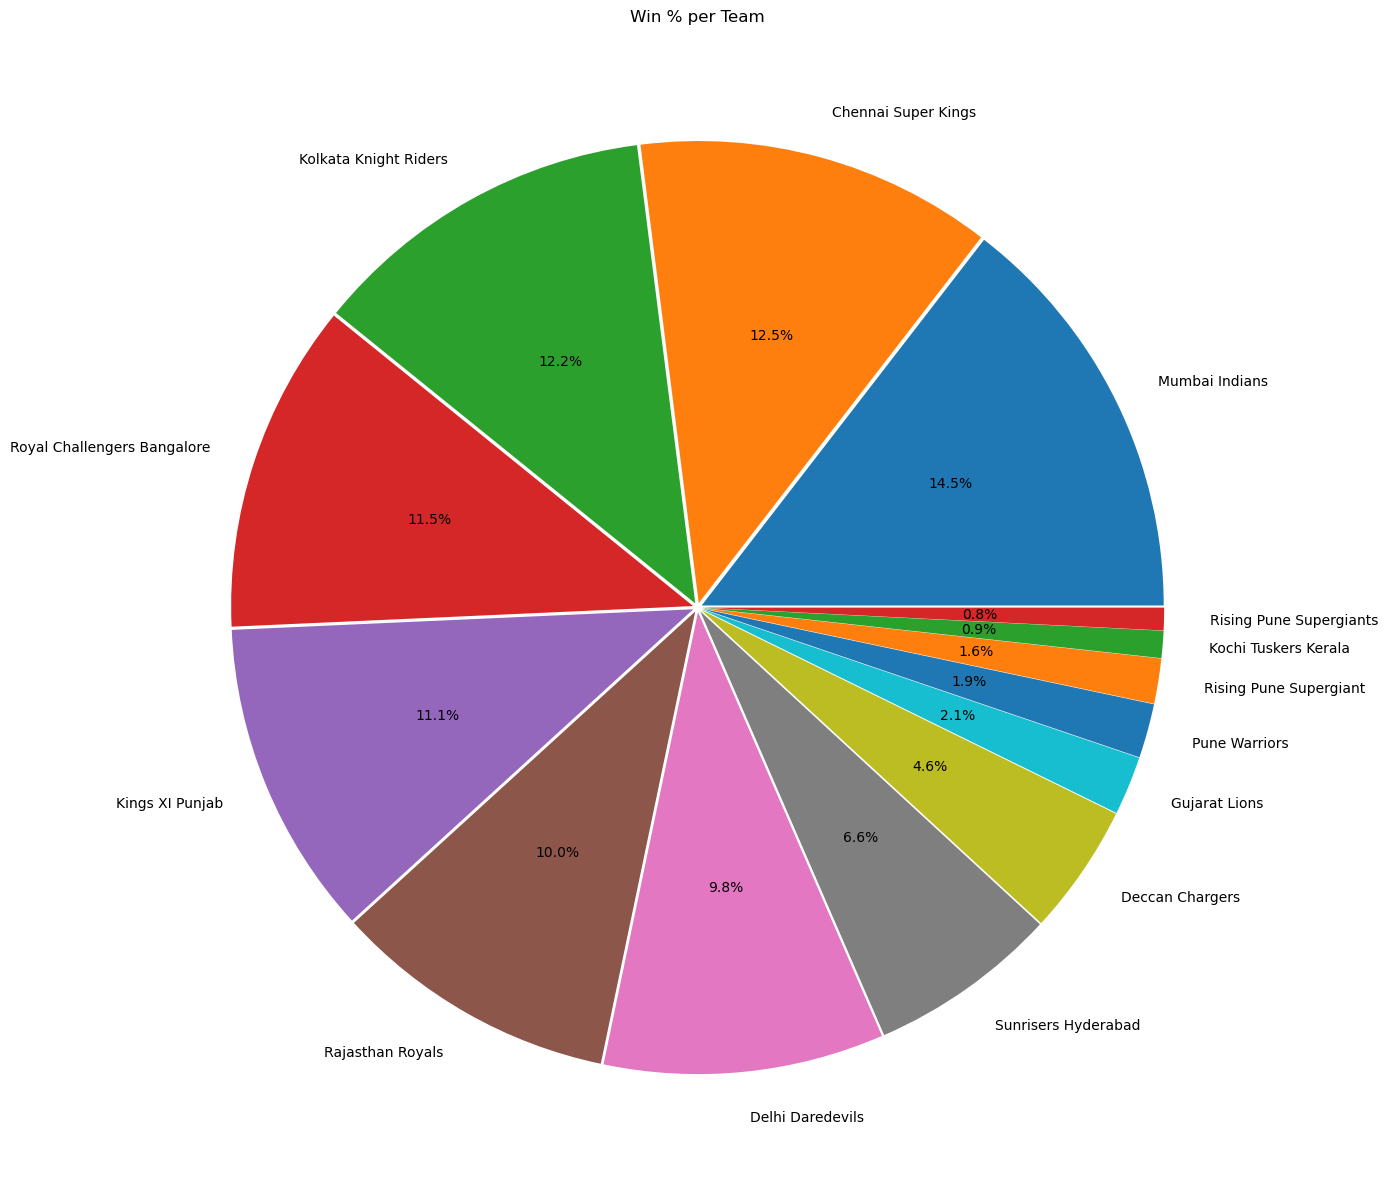

In [12]:
# 2. Visualize the total number of matches won by each team. 
win_counts = df['winner'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(
    win_counts,
    labels=win_counts.index,
    autopct='%1.1f%%', 
    explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
)
plt.title('Win % per Team')
plt.show()

In [18]:
# 3. List the names of umpires who have served as first umpire and the number of matches. 
df['umpire1'].value_counts()

HDPK Dharmasena          73
Asad Rauf                51
AK Chaudhary             43
Aleem Dar                38
BF Bowden                37
S Ravi                   36
BR Doctrove              34
M Erasmus                32
RE Koertzen              20
S Asnani                 19
JD Cloete                16
CB Gaffaney              14
AY Dandekar              13
BG Jerling               13
NJ Llong                 12
KN Ananthapadmanabhan    11
A Nand Kishore           11
VA Kulkarni              11
SS Hazare                11
Nitin Menon              11
RK Illingworth           11
K Hariharan              10
MR Benson                10
S Das                    10
DJ Harper                 9
RM Deshpande              7
GAV Baxter                7
IL Howell                 7
BNJ Oxenford              7
C Shamshuddin             6
SJ Davis                  6
SD Fry                    5
SK Tarapore               5
CK Nandan                 5
YC Barde                  4
PR Reiffel          

<AxesSubplot:>

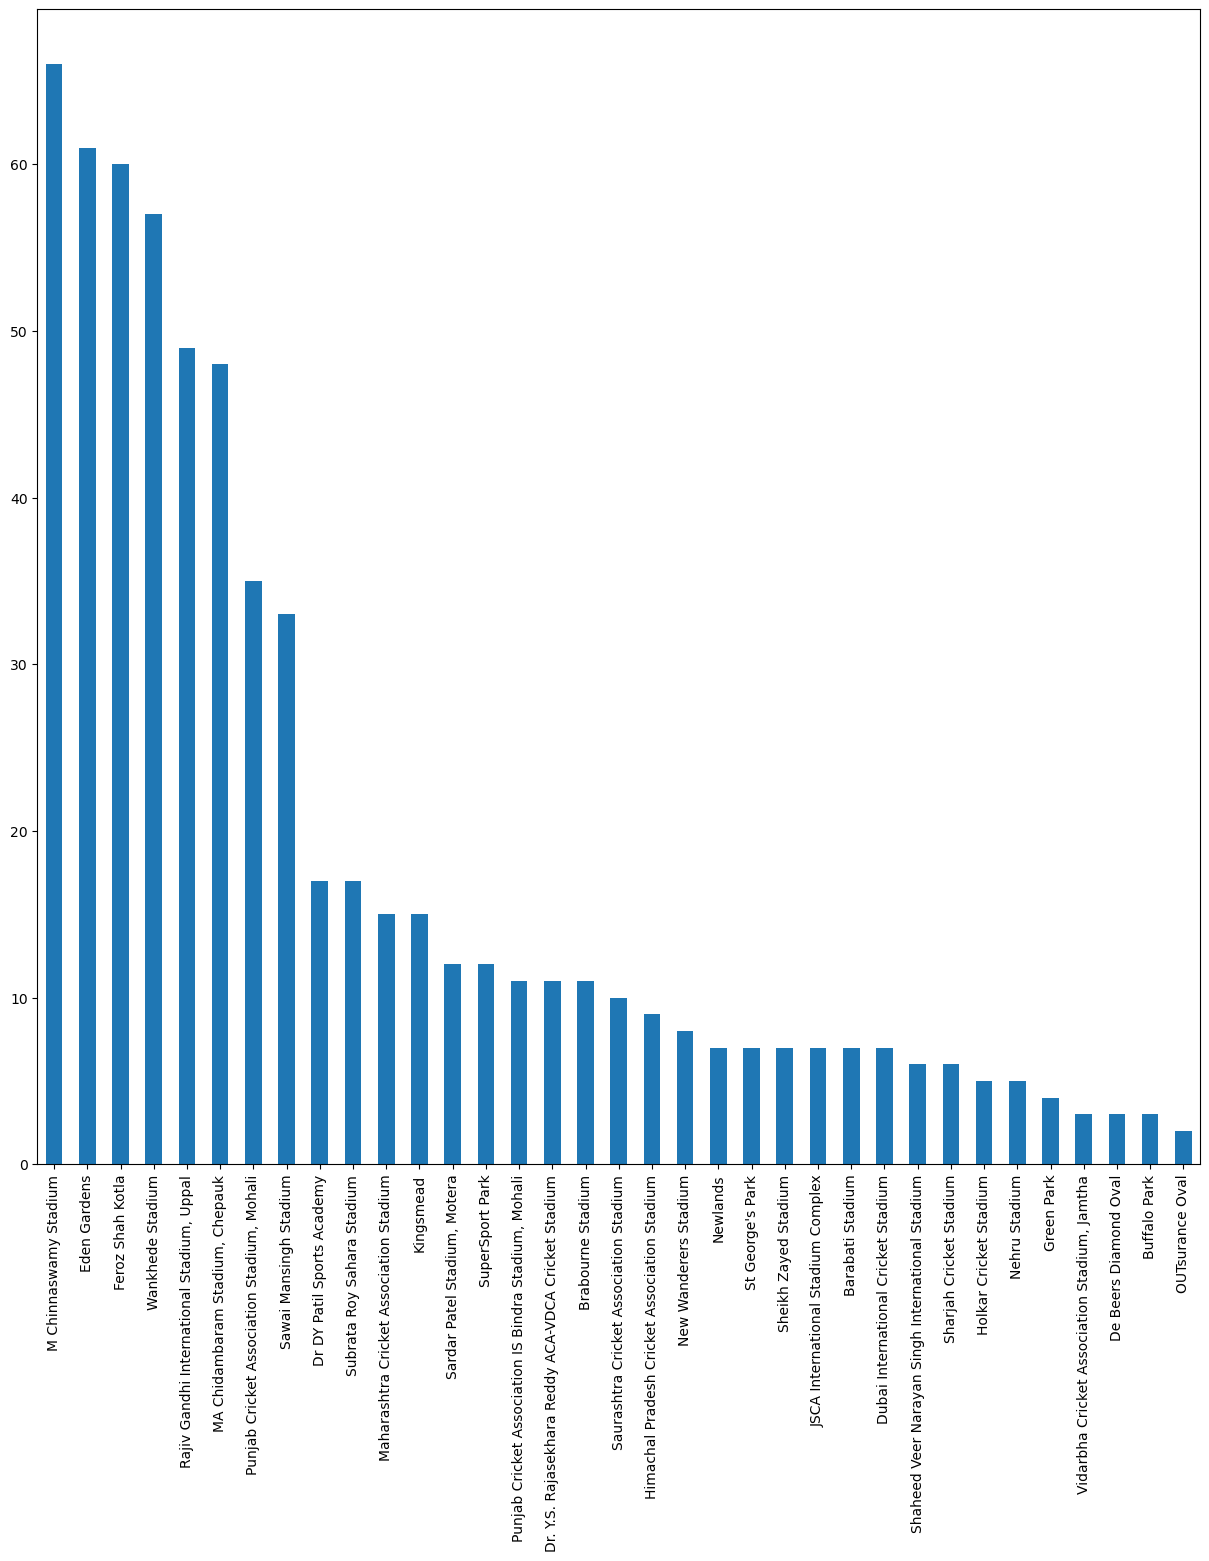

In [22]:
# 4. Visualize how many matches were held in each venue. 
match_count = df['venue'].value_counts()
plt.figure(figsize=(15,15))
match_count.plot(kind='bar')

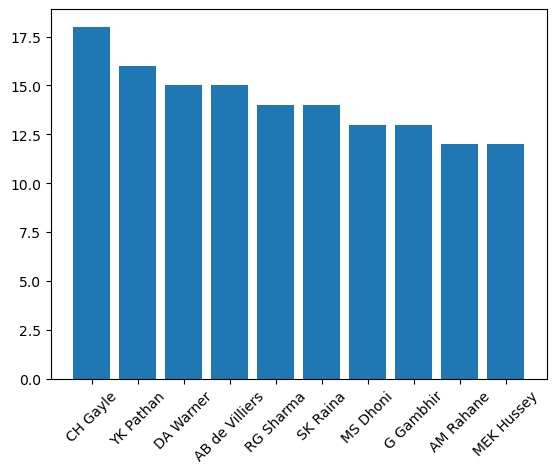

In [32]:
# 5. Visualize the top 10 players identified as the player of the match for the most significant number of matches.
temp=df['player_of_match'].value_counts()
plt.bar(temp.head(n=10).index,temp.head(n=10))
plt.xticks(rotation=45);

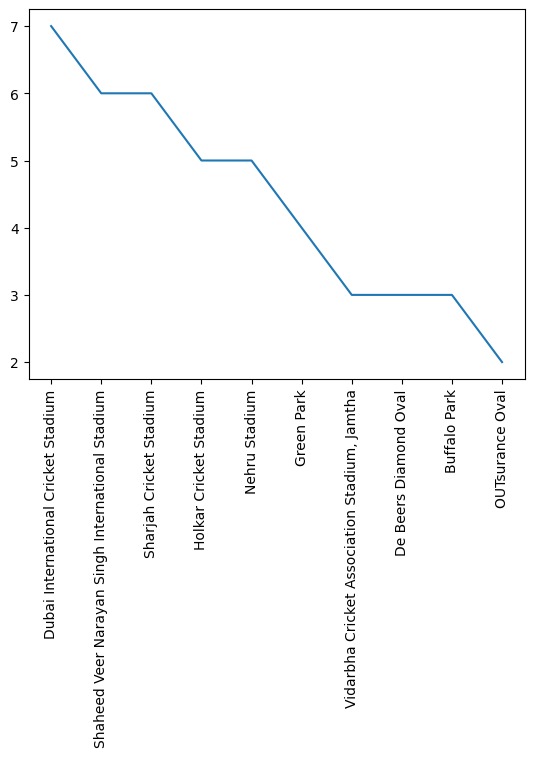

In [34]:
# 6. Visualize the bottom 10 venues where the least number of matches were played.
match_count = df['venue'].value_counts()
plt.plot(match_count.tail(n=10).index,match_count.tail(n=10))
plt.xticks(rotation=90);

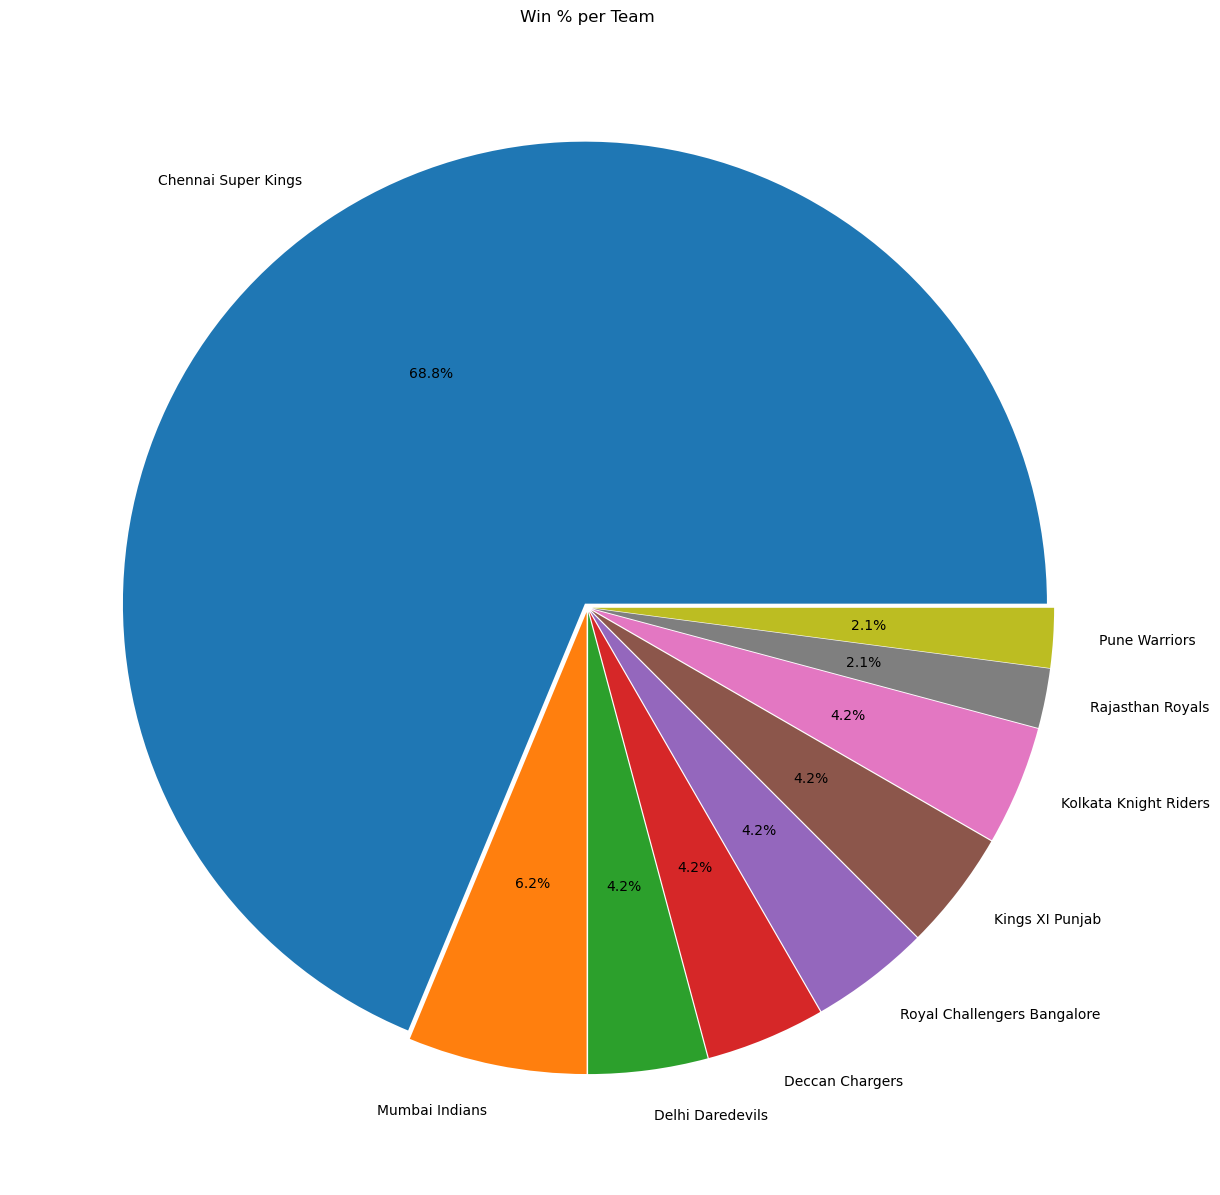

In [41]:
# 7. Visualize the number of wins of each team for the venue of ‘MA Chidambaram Stadium, Chepauk’ 
temp=df[df['venue']=='MA Chidambaram Stadium, Chepauk']
win_counts = temp['winner'].value_counts()
win_counts
plt.figure(figsize=(15,15))
plt.pie(
    win_counts,
    labels=win_counts.index,
    autopct='%1.1f%%', 
    explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
)
plt.title('Win % per Team')
plt.show()

In [45]:
# 8. Find and list the venues where the match resulted in a tie.
temp=df[df['result']=='tie']
temp=temp['venue'].unique()
count=1
for i in temp:
    print(f'{count} - {i}')
    count+=1

1 - Saurashtra Cricket Association Stadium
2 - Newlands
3 - MA Chidambaram Stadium, Chepauk
4 - Rajiv Gandhi International Stadium, Uppal
5 - M Chinnaswamy Stadium
6 - Sheikh Zayed Stadium
7 - Sardar Patel Stadium, Motera


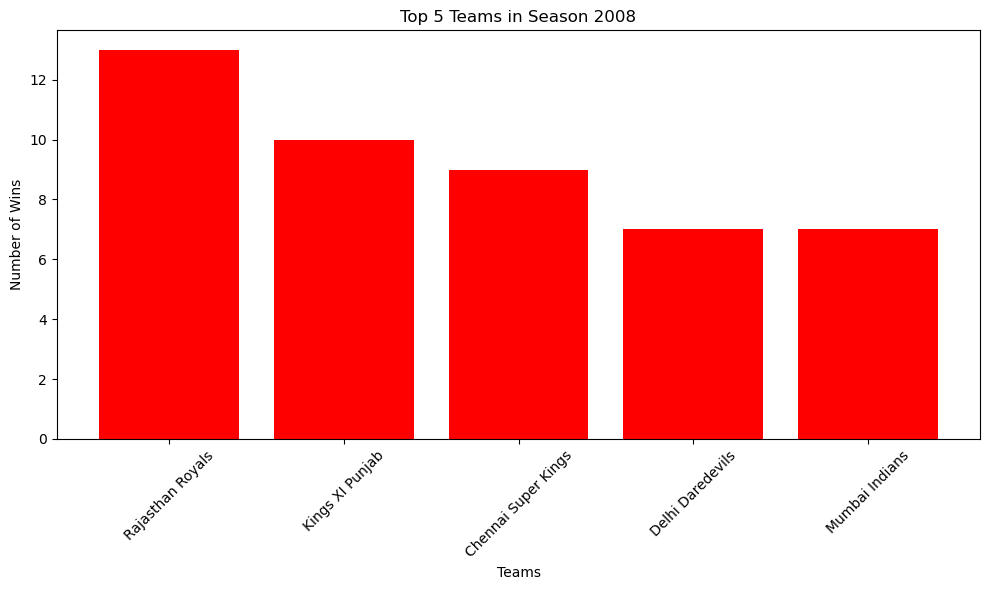

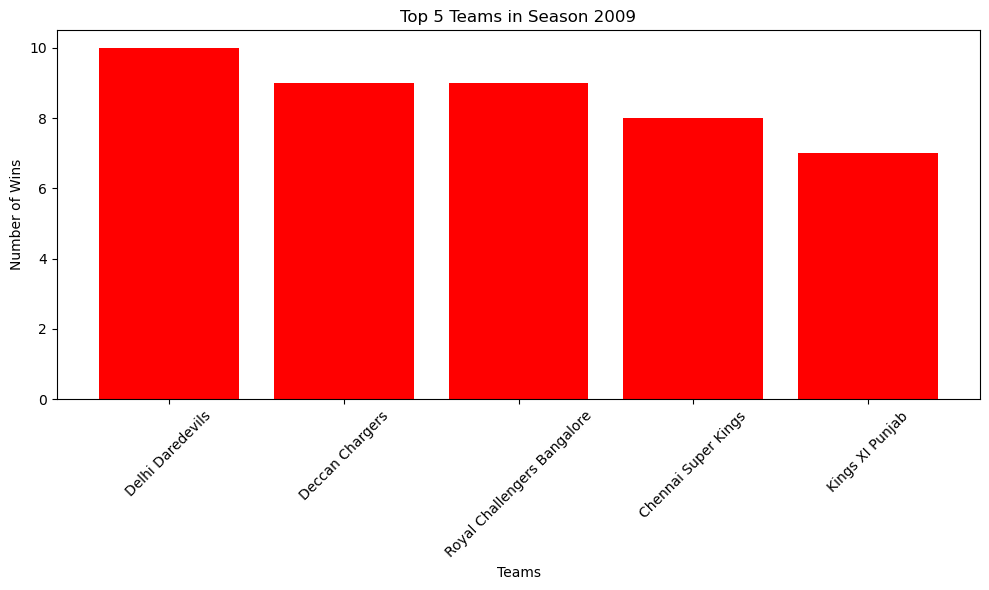

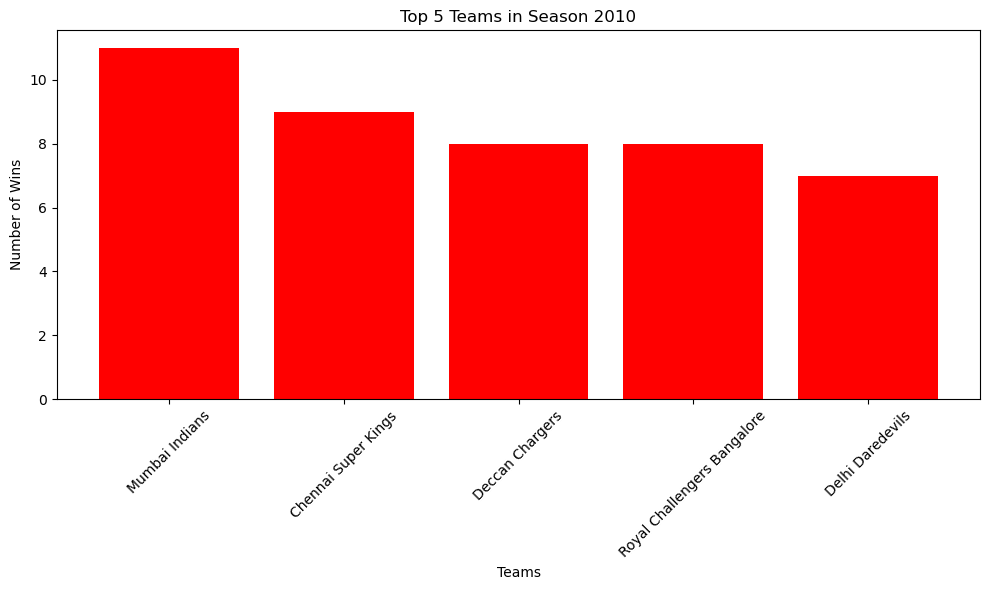

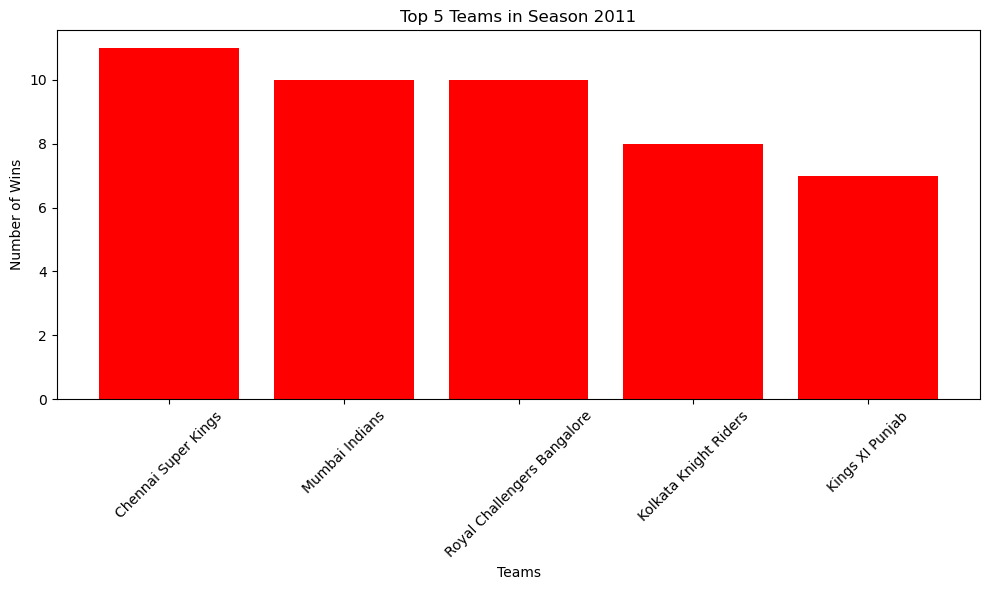

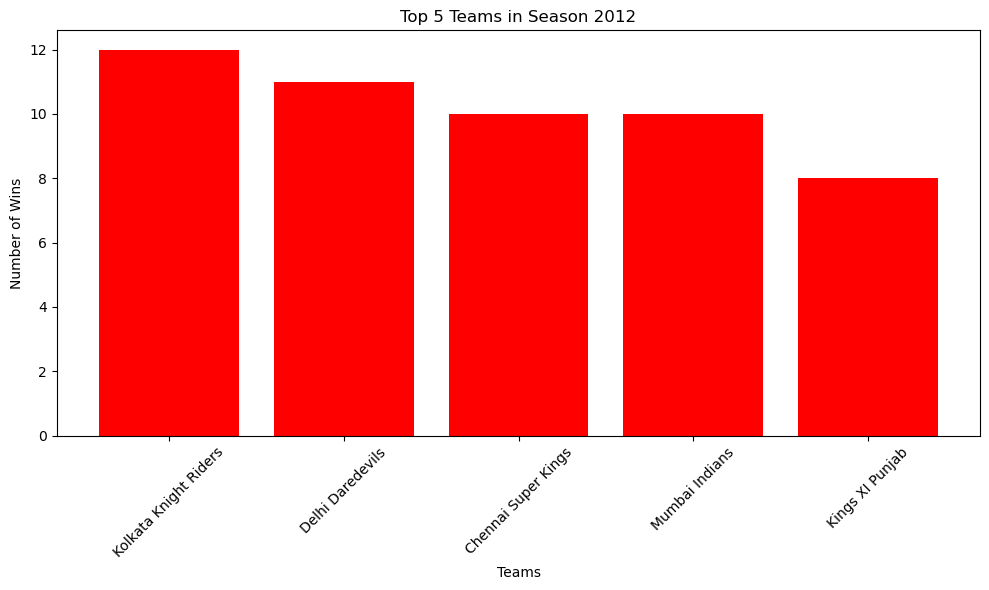

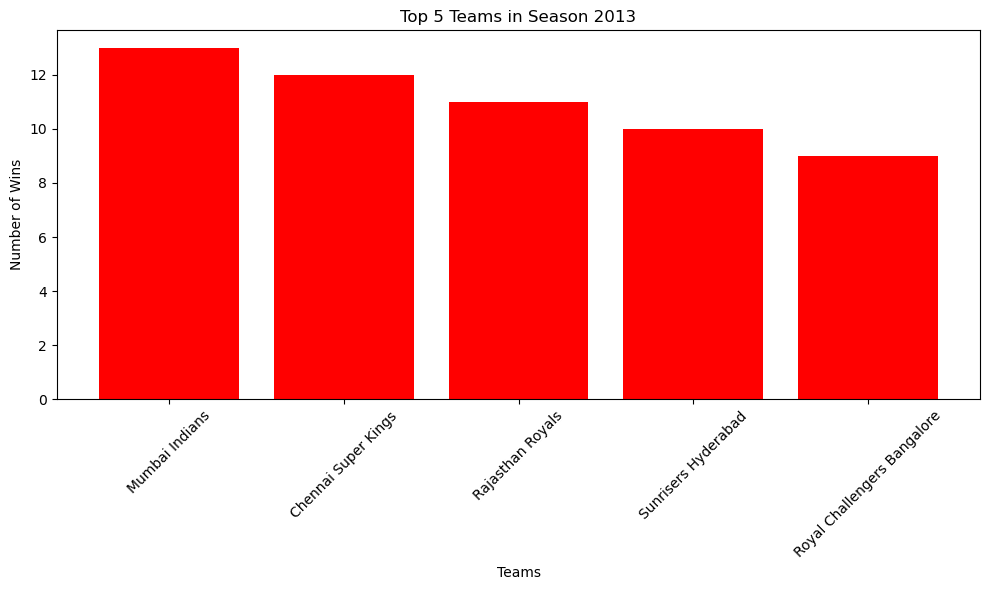

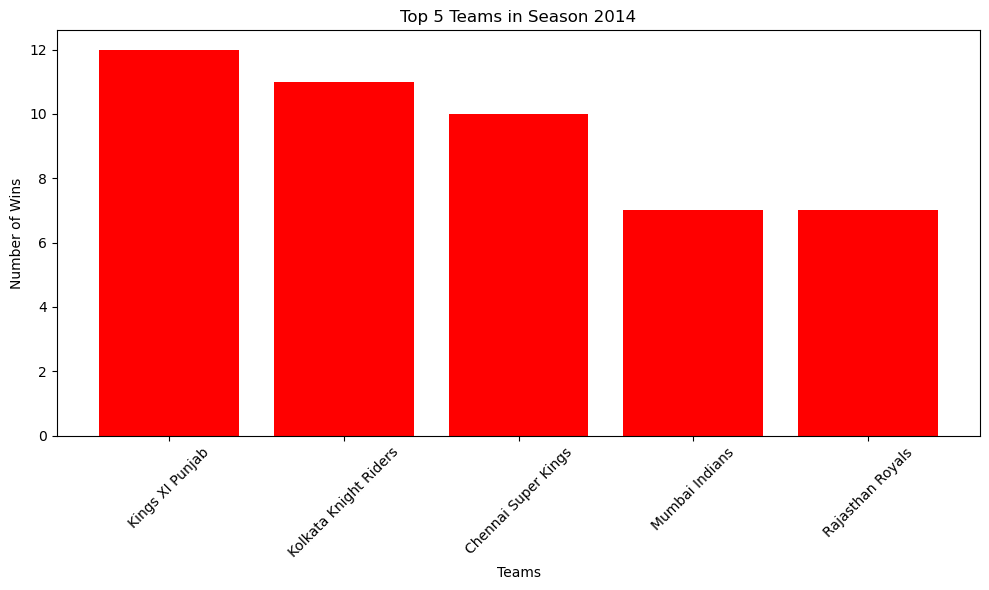

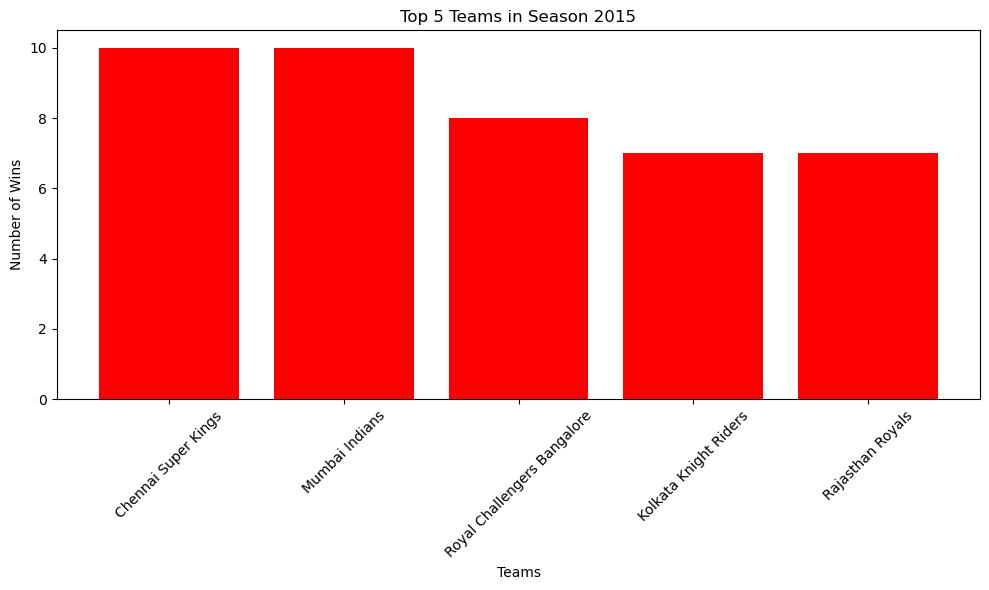

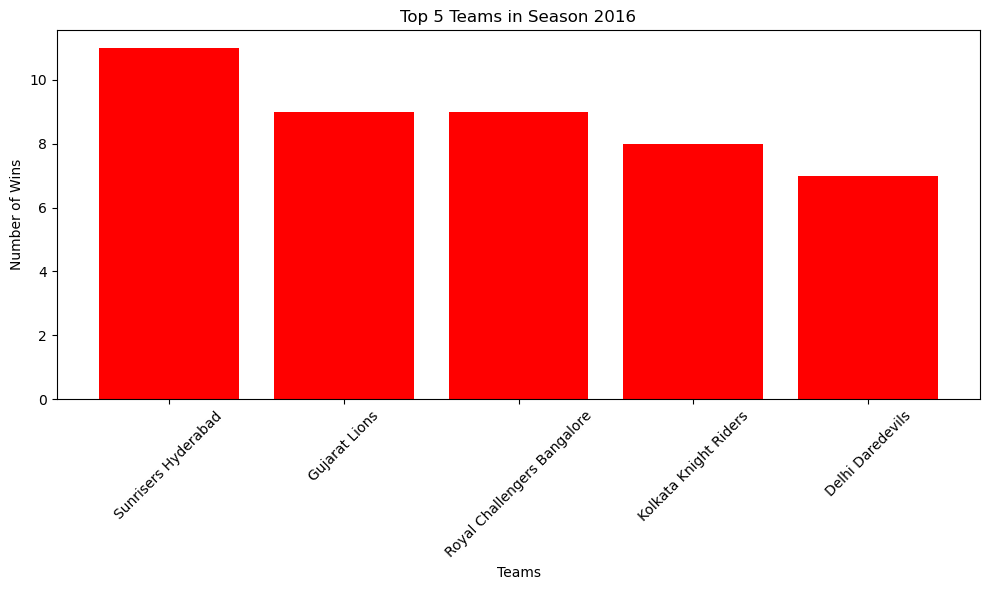

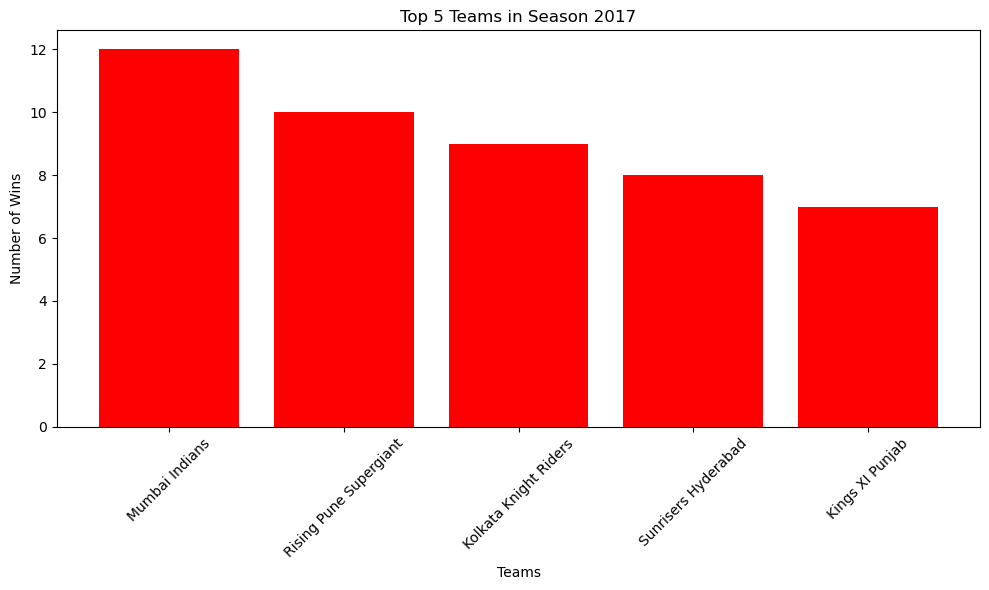

In [50]:
# 9. List and visualize the best teams(top 5), season-wise. 

season_wins = df.groupby(['season', 'winner']).size().reset_index(name='wins')
top_teams = season_wins.sort_values(['season', 'wins'], ascending=[True, False])
top_teams = top_teams.groupby('season').head(5)
seasons = top_teams['season'].unique()
for season in seasons:
    subset = top_teams[top_teams['season'] == season]
    plt.figure(figsize=(10, 6))
    plt.bar(subset['winner'], subset['wins'], color='red')
    plt.title(f'Top 5 Teams in Season {season}')
    plt.xlabel('Teams')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

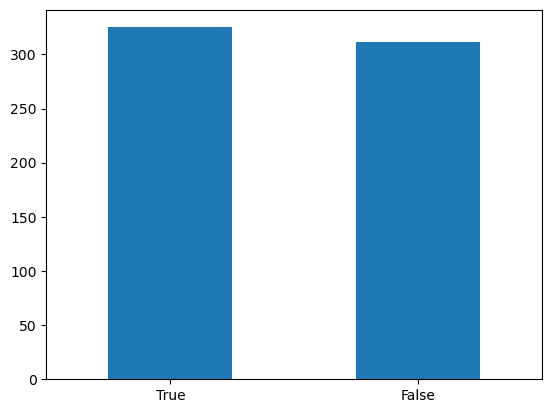

In [81]:
# 10. Analyse and visualize the relationship between winning the toss and winning the match.
(df['toss_winner']==df['winner']).value_counts().plot(kind='bar')
plt.xticks(rotation=0);